In [18]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from pylab import cm

In [19]:
h=0.05                 # stepsize
m=int(1/h+1)            # num of steps
Xh=np.linspace(0,1,m)   # array from 0 to 1 in h
b=-np.ones((m,1))       # matrix with -1

In [20]:
d0 = -2*np.ones((1,m))      # matrix with -2
d0[0,0], d0[0,-1] = 1, 1    # BC entries last and first value to 1
d1 = np.ones((1, m-1))      # matix wit -1
d1[0,0] = 0                 # BC entries first value to 0
d2 = np.flip(d1, 1)         # is d1 fliped
A = (1/h**2)*(sp.diags(d0, [0]) + sp.diags(d1, [1]) + sp.diags(d2,[-1]))

In [21]:
u=spsolve(A,b)

In [22]:
x, y, z = np.meshgrid(np.arange(0, 1+h, h),
                      np.arange(0, 1+h, h),
                      np.arange(0, 1+h, h))

In [23]:
E_x = np.ones((m,m,m))
E_y = np.zeros((m,m,m))
E_z = np.zeros((m,m,m))

In [24]:
#listing the scalar values
the_fourth_dimension =  np.array([])
for i in range(y.shape[0]-1,-1,-1):
    for q in range(y.shape[0]-1,-1,-1):
        for r in range(y.shape[0]-1,-1,-1):
            the_fourth_dimension= np.append(the_fourth_dimension,u[q])  

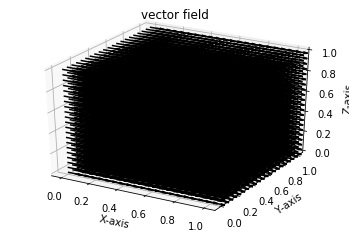

In [25]:
# creating figures
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection='3d')

ax_1.set_title("vector field")
ax_1.set_xlabel('X-axis')
ax_1.set_ylabel('Y-axis')
ax_1.set_zlabel('Z-axis')
ax_1.quiver(x, y, z, E_x, E_y, E_z, length=0.1, color = 'black')

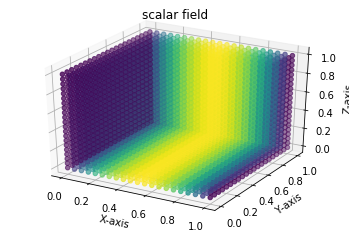

In [26]:
# creating figures
fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(111, projection='3d')
  
# adding title and labels
ax_2.set_title("scalar field")
ax_2.set_xlabel('X-axis')
ax_2.set_ylabel('Y-axis')
ax_2.set_zlabel('Z-axis')

ax_2.scatter(x, y, z, c=the_fourth_dimension, cmap='viridis', marker='o')

# displaying plot
plt.show()